In [48]:
import os

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [49]:
os.chdir('/Users/cgu3/Documents/Grape-Pi')

(array([1.1767e+04, 1.3400e+03, 1.0360e+03, 9.0900e+02, 7.4900e+02,
        7.5600e+02, 6.3800e+02, 6.0600e+02, 6.6000e+02, 6.3000e+02,
        7.0100e+02, 5.9500e+02, 5.8600e+02, 6.2300e+02, 6.1500e+02,
        5.9600e+02, 6.4500e+02, 5.1700e+02, 5.9100e+02, 4.8000e+02,
        4.7500e+02, 5.0300e+02, 4.9000e+02, 4.7100e+02, 4.0200e+02,
        3.9700e+02, 4.0500e+02, 3.2700e+02, 3.2200e+02, 3.0100e+02,
        2.9700e+02, 2.6300e+02, 2.3900e+02, 2.1000e+02, 1.9100e+02,
        1.5700e+02, 1.5400e+02, 1.4800e+02, 1.0400e+02, 9.8000e+01,
        8.5000e+01, 8.0000e+01, 6.4000e+01, 7.2000e+01, 6.5000e+01,
        6.0000e+01, 4.8000e+01, 3.3000e+01, 2.4000e+01, 3.1000e+01,
        2.3000e+01, 1.9000e+01, 1.6000e+01, 1.0000e+01, 1.2000e+01,
        1.2000e+01, 1.6000e+01, 3.0000e+00, 1.4000e+01, 1.2000e+01,
        6.0000e+00, 6.0000e+00, 6.0000e+00, 1.0000e+00, 3.0000e+00,
        2.0000e+00, 2.0000e+00, 1.0000e+00, 1.0000e+00, 0.0000e+00,
        3.0000e+00, 0.0000e+00, 1.0000e+00, 1.00

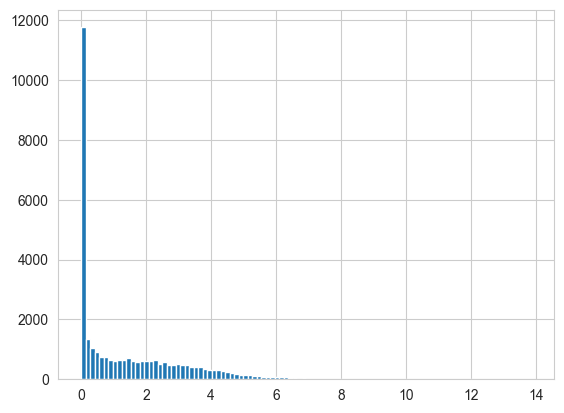

In [50]:
mRNA_data = pd.read_csv('data/miscellaneous/mRNA-data/processed_RNA_data.csv')
mRNA_data = mRNA_data.rename(columns={mRNA_data.columns[0]: 'gene_symbol'})
mRNA_data = mRNA_data.loc[:, ['gene_symbol', 'IP0981_1701']]
mRNA_data['IP0981_1701'] = np.log(mRNA_data['IP0981_1701'] + 1)
mRNA_data.head()
plt.hist(mRNA_data['IP0981_1701'], bins=100)

In [51]:
protein_data = pd.read_csv('data/single-soft-label/raw/additional/SG_combined_protein_0981_with_soft_label.csv')
protein_data

,protein.Accession,protein_probability,protein_probability_soft_label
0,A0A024RBG1,0.890032,0.999992
1,A0A075B6H7,0.700122,0.953707
2,A0A075B6H8,0.286947,0.286947
3,A0A075B6L6,0.943529,0.986579
4,A0A075B6N1,0.289680,0.537125
...,...,...,...
20421,Q9UI54,0.000000,0.000000
20422,Q9Y3F1,0.000000,0.748260
20423,Q9Y6C7,0.000000,0.652250
20424,Q9Y6Z2,0.000000,0.000000


In [52]:
import pandas as pd

def get_values_from_dict(keys, dictionary, na_rm=True):
    # Ensure the dictionary is a DataFrame
    dictionary = pd.DataFrame(dictionary)
    
    # Check for duplicated keys in the dictionary
    if dictionary.iloc[:, 0].duplicated().any():
        raise ValueError("Non-unique keys in dictionary: the same key can be mapped to multiple values")
    
    # Convert keys to a DataFrame
    keys_df = pd.DataFrame({'key': keys})
    
    # Join keys with the dictionary to get the corresponding values
    merged = keys_df.merge(dictionary, left_on='key', right_on=dictionary.columns[0], how='left')
    
    # Select the values column
    values = merged[dictionary.columns[1]]
    
    # If na_rm is True, remove NA values
    if na_rm:
        values = values.dropna()
    
    return values.tolist()

# Example usage:
# dictionary = {'key_column': ['a', 'b', 'c'], 'value_column': [1, 2, 3]}
# keys = ['a', 'b']
# print(get_values_from_dict(keys, dictionary))


In [53]:
acc_to_gene_symbol_dict = pd.read_table('data/miscellaneous/uniprotkb_swiss_prot.tsv', sep='\t')
acc_to_gene_symbol_dict

,Entry,Gene Names (primary),Length
0,A0A087X1C5,CYP2D7,515
1,A0A0B4J2F0,PIGBOS1,54
2,A0A0B4J2F2,SIK1B,783
3,A0A0C5B5G6,MT-RNR1,16
4,A0A0K2S4Q6,CD300H,201
...,...,...,...
20421,Q9UI72,NaN,69
20422,Q9Y3F1,NaN,56
20423,Q9Y6C7,LINC00312,94
20424,Q9Y6Z2,LINC01558,57


In [54]:
protein_data['gene_symbol'] = get_values_from_dict(protein_data['protein.Accession'], acc_to_gene_symbol_dict, na_rm=False)
protein_data.head()

,protein.Accession,protein_probability,protein_probability_soft_label,gene_symbol
0,A0A024RBG1,0.890032,0.999992,NUDT4B
1,A0A075B6H7,0.700122,0.953707,IGKV3-7
2,A0A075B6H8,0.286947,0.286947,IGKV1D-42
3,A0A075B6L6,0.943529,0.986579,TRBV7-3
4,A0A075B6N1,0.289680,0.537125,TRBV19


In [55]:
merged_data = pd.merge(protein_data, mRNA_data, on='gene_symbol', how='left')
merged_data.fillna(0, inplace=True)
merged_data = merged_data.rename(columns={'IP0981_1701': 'mRNA_TPM'})

In [56]:
merged_data

,protein.Accession,protein_probability,protein_probability_soft_label,gene_symbol,mRNA_TPM
0,A0A024RBG1,0.890032,0.999992,NUDT4B,0.0000
1,A0A075B6H7,0.700122,0.953707,IGKV3-7,0.0000
2,A0A075B6H8,0.286947,0.286947,IGKV1D-42,0.0000
3,A0A075B6L6,0.943529,0.986579,TRBV7-3,0.0000
4,A0A075B6N1,0.289680,0.537125,TRBV19,0.0000
...,...,...,...,...,...
20421,Q9UI54,0.000000,0.000000,0,0.0000
20422,Q9Y3F1,0.000000,0.748260,0,0.0000
20423,Q9Y6C7,0.000000,0.652250,LINC00312,0.0000
20424,Q9Y6Z2,0.000000,0.000000,LINC01558,0.0531


In [57]:
merged_data.to_csv('data/single-soft-label/raw/protein/SG_combined_protein_0981_with_soft_label_and_mRNA_TPM.csv', index=False)